In [167]:
import numpy as np
import matplotlib.pyplot as plt

## Part 1

In [168]:
def func(x):
    if x <= 1:
        return 3
    if 1 < x <= 2:
        return 4-x
    if 2 < x <= 3:
        return 2
    if 3 < x <= 4:
        return 5-x
    return x-3

def gradf(x):
    if x <= 1:
        return 0
    if 1 < x <= 2:
        return -1
    if 2 < x <= 3:
        return 0
    if 3 < x <= 4:
        return -1
    return 1

## Part 2

In [169]:
def gd(gradf, alpha, max_iter, x0=1.1):
    x_old = x0
    for iteration in range(max_iter):
        x_new = x_old - alpha*gradf(x_old)
        if x_new == x_old:
            print('Converged to minimizer:', x_new, 'in', iteration+1, 'iterations.')
            return x_new
        x_old = x_new
    print('Found minimizer:', x_new, 'in', iteration+1, 'iterations.')
    return x_new

def gd_momentum(gradf, alpha, max_iter, x0=1.1, beta=0.95):
    x_old = x0
    v = 0
    for iteration in range(max_iter):
        v = beta*v + (1-beta)*gradf(x_old)
        x_new = x_old - alpha*v
        if x_new == x_old:
            print('Converged to minimizer:', x_new, 'in', iteration+1, 'iterations.')
            return x_new
        x_old = x_new
    print('Found minimizer:', x_new, 'in', iteration+1, 'iterations.')
    return x_new

### Testing

gradient descent

In [170]:
gd(gradf=gradf, alpha=0.1, max_iter=200, x0=1.1)

Converged to minimizer: 2.000000000000001 in 10 iterations.


2.000000000000001

gradient descent with momentum

In [171]:
gd_momentum(gradf=gradf, alpha=0.1, max_iter=200, x0=1.1, beta=0.95)

Found minimizer: 4.041893665189231 in 200 iterations.


4.041893665189231

### GD vs GD with momentum:

Using learning rate 0.1 and 200 max iterations, GD converges to a minimizer ~2.0 in 10 iterations while GD with momentum finds a minimizer ~4.0 after 200 iterations. GD and GD with momentum find different minimizers because GD finds a local minimizer of func while GD with momentum finds the global minimizer of func.

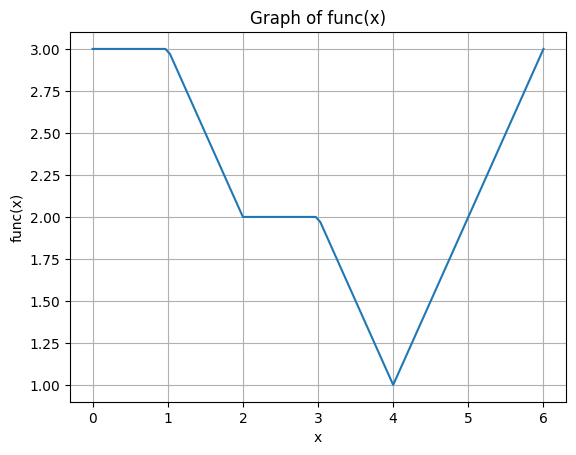

In [172]:
X = np.linspace(0, 6, 100)
y = np.array([func(x) for x in X])

plt.plot(X, y)
plt.xlabel('x')
plt.ylabel('func(x)')
plt.title('Graph of func(x)')
plt.grid(True)
plt.show()

This makes sense: GD starting from x0=1.1 will encounter the plateau region of func from x=2 to x=3 where gradf=0 and "converge" to a local minimizer. GD with momentum on the other hand will accelerate past the plateau and find the global minimizer of func at x=4. Thus the benefit of GD with momentum is demonstrated.